<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats 
from scipy.stats import norm

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'cookie_cats.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'mock_sales_data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'match_result_test.csv',
 'online_retail.xlsx',
 'scanner_data.csv',
 'app_wau.csv',
 '1_customers_dataset.csv',
 '1_orders_dataset.csv',
 'ab_experiment.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_data_with_stores.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'test.csv',
 'mall_customers.csv',
 'bz_data_analyis.csv',
 '1_order_payments_dataset.csv',
 'lead_conversion.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [8]:
df = pd.read_csv('mall_customers.csv')
df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', re.sub('\(.+\)| ', '', a))).lower().lstrip('_') for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


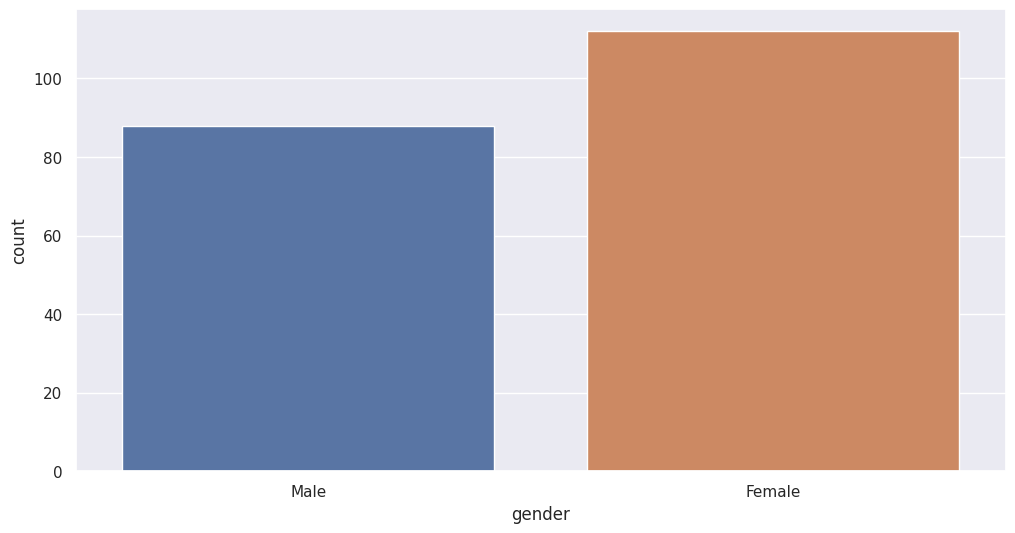

In [9]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.countplot(data = df, x = 'gender')
plt.show()

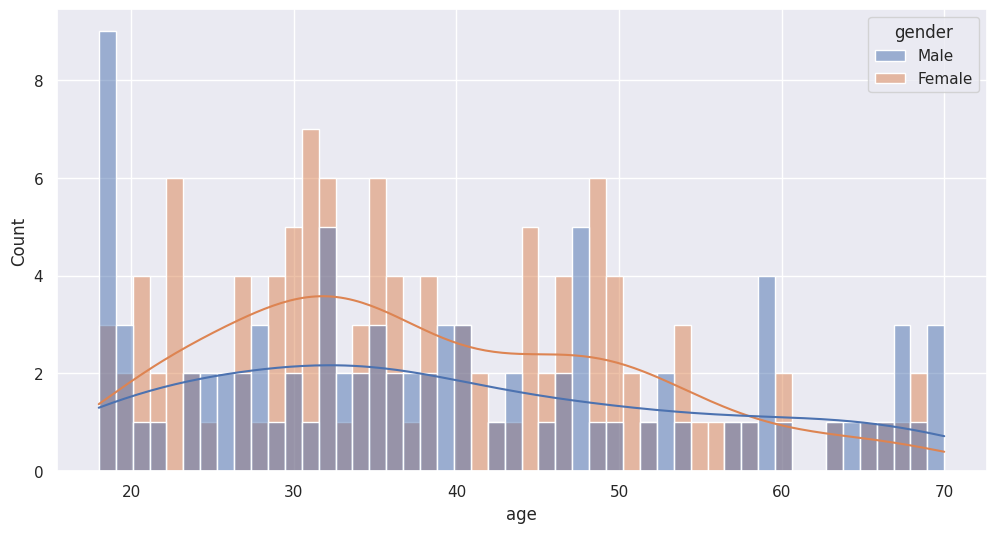

In [12]:
sns.histplot(data = df, x = 'age', hue = 'gender', bins = 50, kde = True)
plt.show()

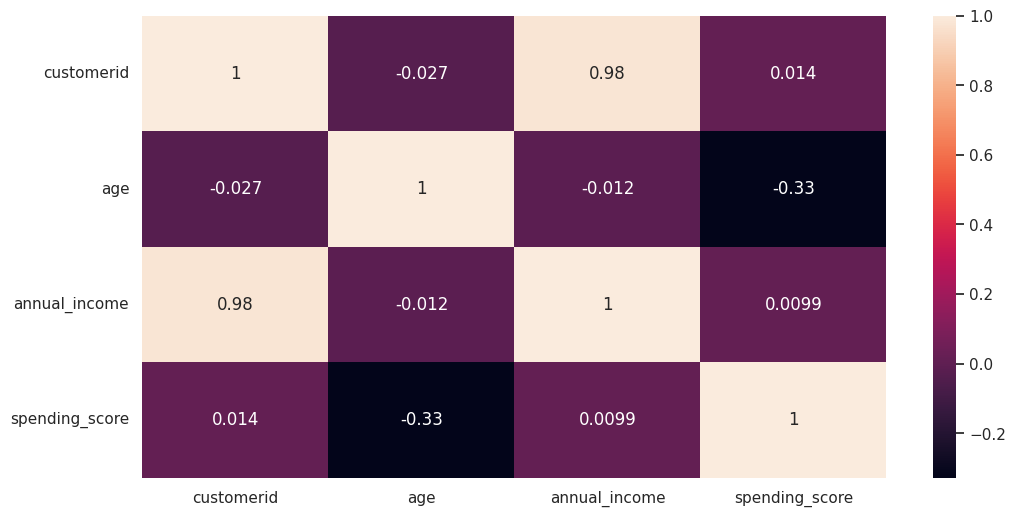

In [13]:
sns.heatmap(df.corr(), annot = True)
plt.show()

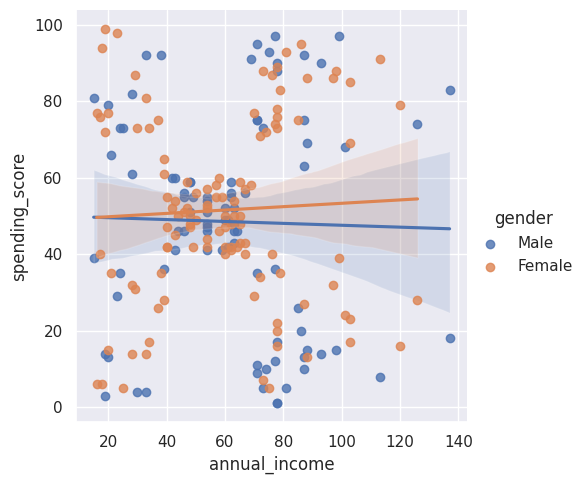

In [14]:
sns.lmplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')
plt.show()

# Iterators

In [15]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [17]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [18]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}